In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
import tensorflow as tf
from tensorflow import keras
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [2]:
x_train = pd.read_csv("C:/Users/Soukaina/Devoirs DL/AHW/Arabic Handwritten Characters Dataset CSV/TrainImages.csv",header=None)
y_train = pd.read_csv("C:/Users/Soukaina/Devoirs DL/AHW/Arabic Handwritten Characters Dataset CSV/TrainLabel.csv",header=None)

x_test = pd.read_csv("C:/Users/Soukaina/Devoirs DL/AHW/Arabic Handwritten Characters Dataset CSV/TestImages.csv",header=None)
y_test = pd.read_csv("C:/Users/Soukaina/Devoirs DL/AHW/Arabic Handwritten Characters Dataset CSV/TestLabel.csv",header=None)

In [3]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()-1

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()-1

In [4]:
print('Train Data Size',x_train.shape,y_train.shape)
print('Test Data Size',x_test.shape,y_test.shape)

Train Data Size (13440, 1024) (13440, 1)
Test Data Size (3360, 1024) (3360, 1)


In [6]:
x_train = x_train.reshape(-1,32,32)
x_test = x_test.reshape(-1,32,32)

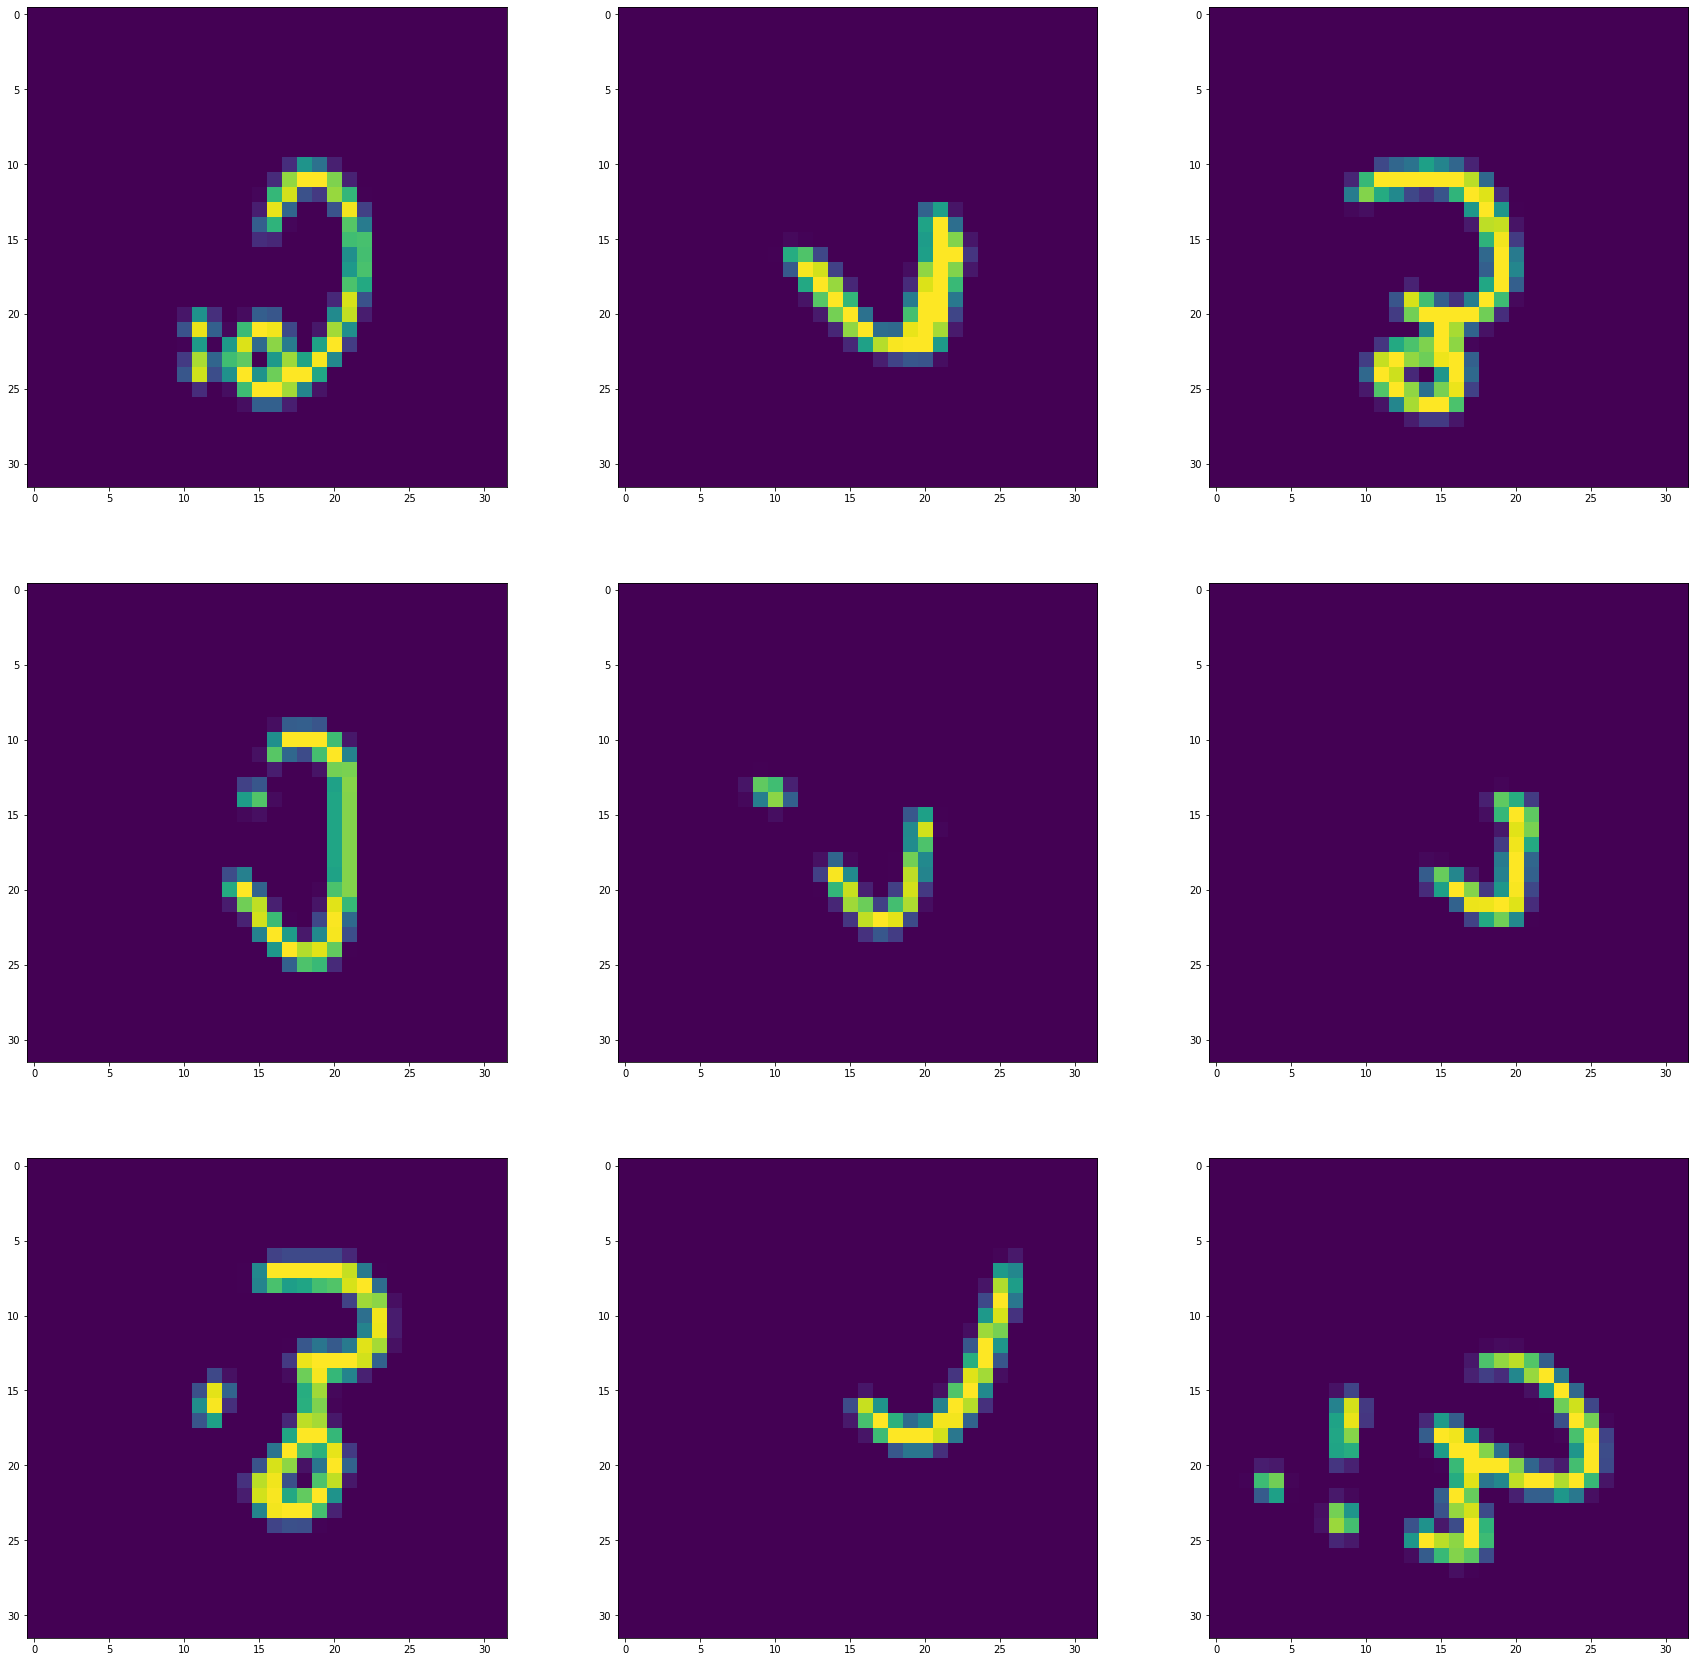

In [7]:
fig, ax = plt.subplots(3,3, figsize = (30,30))

for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[np.random.randint(0,x_train.shape[0])])

In [8]:
x_train = x_train/255
x_test = x_test/255

In [10]:
# for some reason the images are flipped and rotated
# so we transpose each image to be in the correct shape
x_train = np.array([image.T for image in x_train])
x_test = np.array([image.T for image in x_test])

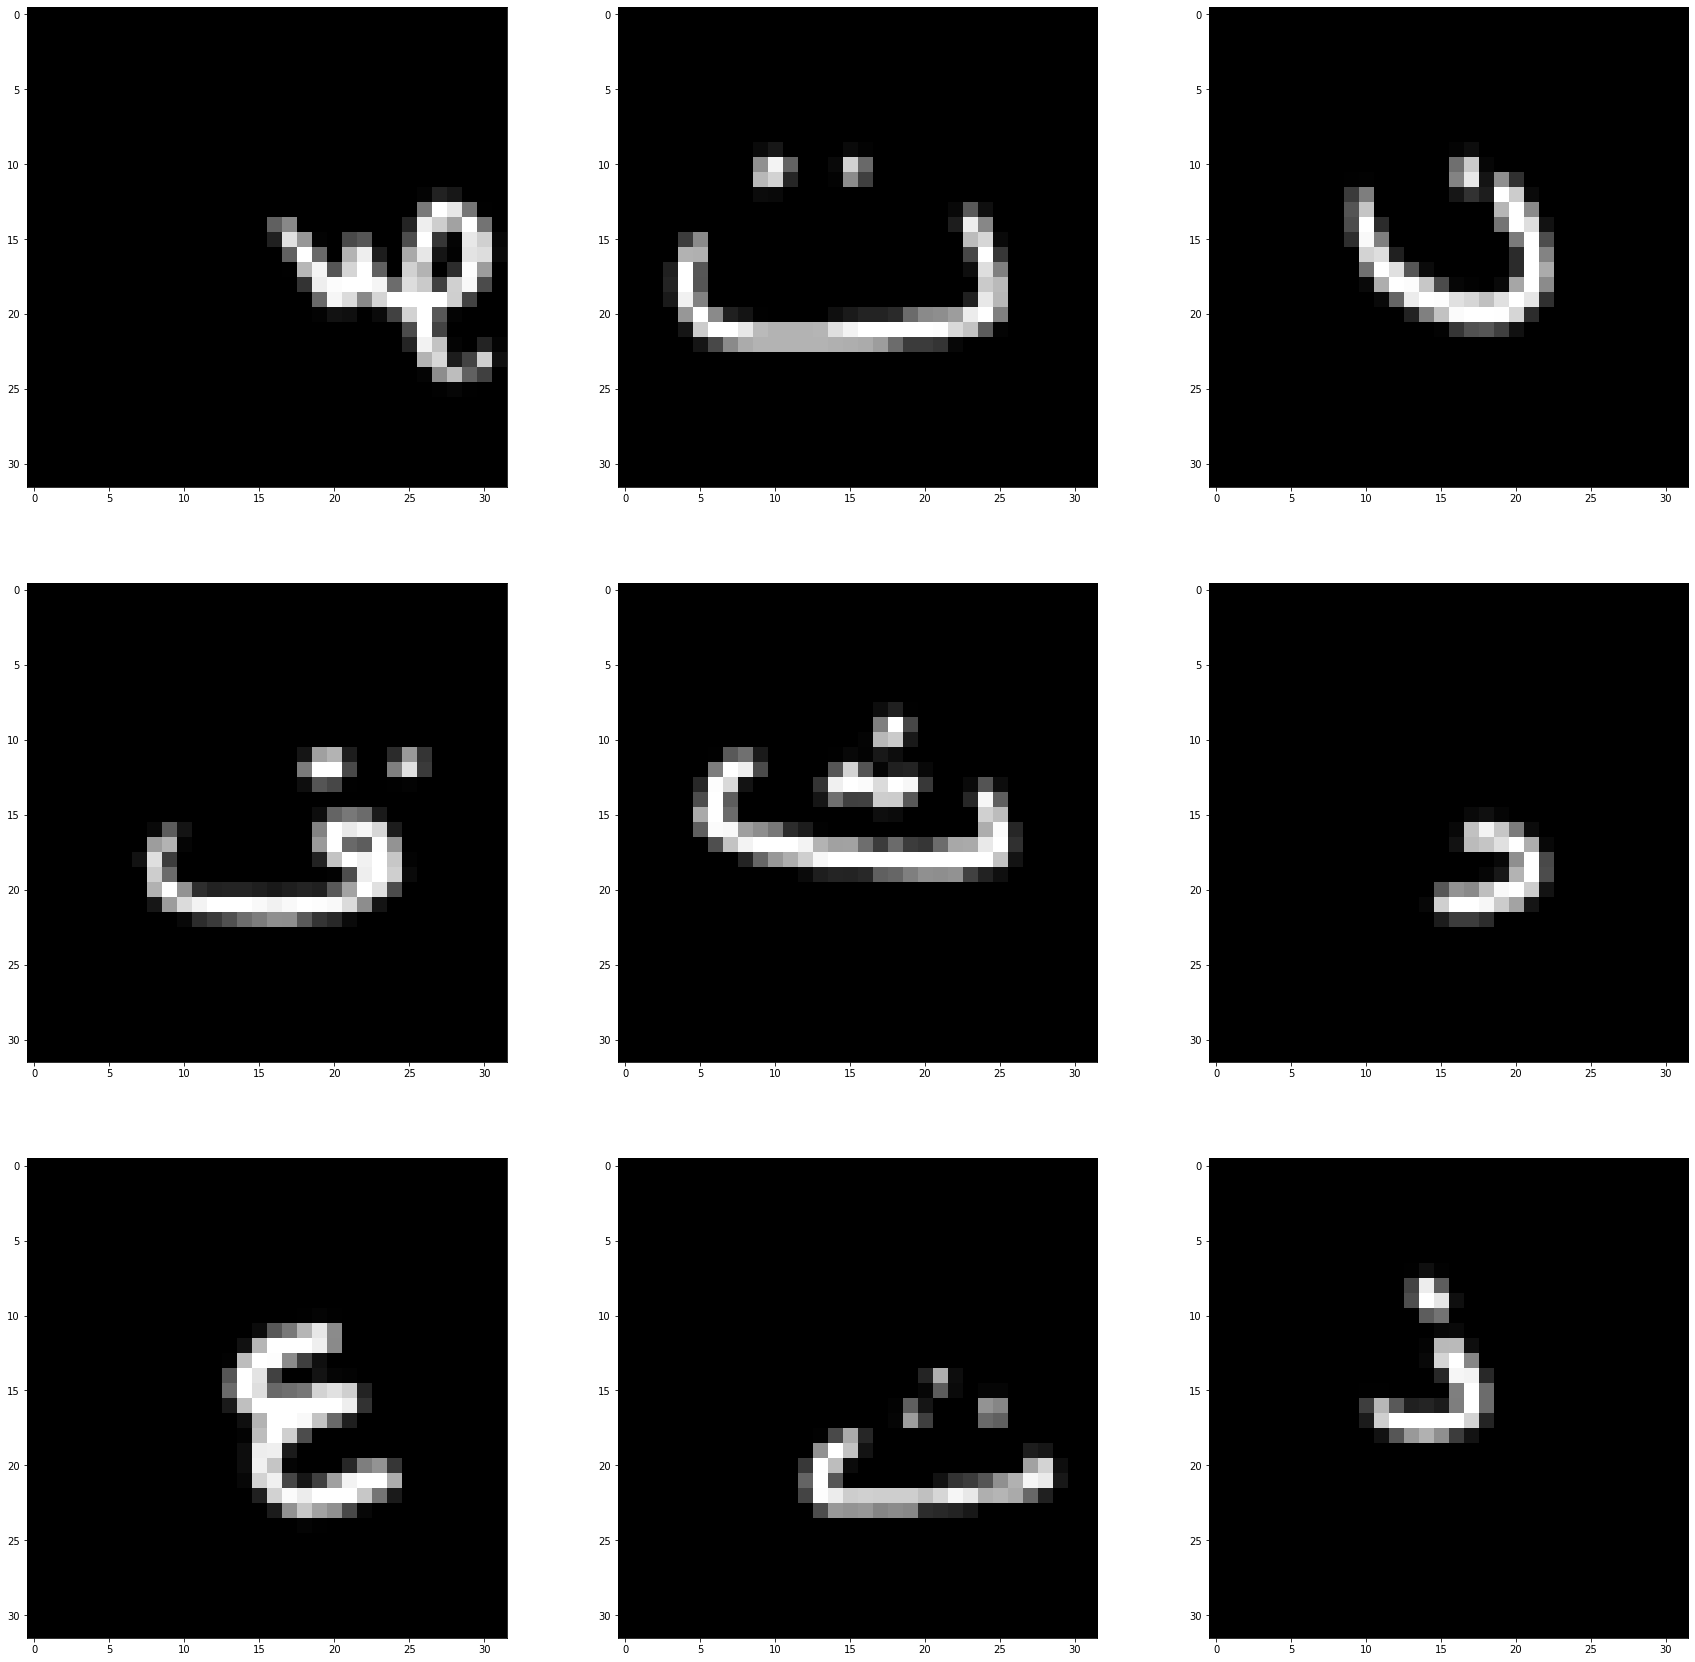

In [15]:
fig, ax = plt.subplots(3,3, figsize = (30,30))

for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[np.random.randint(0,x_train.shape[0])],"gray")

In [12]:
# shuffle
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

print(x_train.shape, x_test.shape)

(13440, 32, 32) (3360, 32, 32)


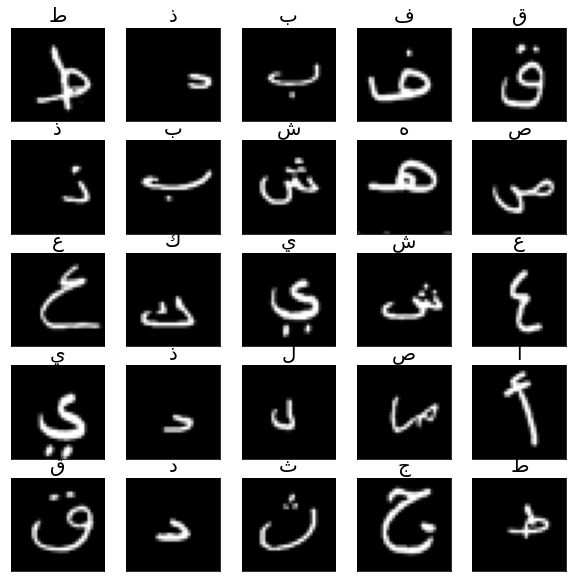

In [13]:
# set the arabic alphabet
arabic_chars =list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
arabic_chars

ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32),"gray")
    plt.title(arabic_chars[int(y_train[ra[i]][0])], fontsize = 20)
plt.show()

In [16]:
#squeeze
y_train = y_train.reshape(-1) 
y_test = y_test.reshape(-1)

y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train_h.shape, y_test_h.shape)

(13440,) (3360,)
(13440, 28) (3360, 28)


In [18]:
x_train = x_train.reshape(-1,32,32, 1)
x_test = x_test.reshape(-1,32,32, 1)
print(x_train.shape, x_test.shape)

(13440, 32, 32, 1) (3360, 32, 32, 1)


In [19]:
train_datagen=ImageDataGenerator(
    #rescale=1/255, # Normalize the new images
    zoom_range=0.2, #the amount of zooming u need
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
#     rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,y_train ,batch_size=64
)

test_datagen=ImageDataGenerator()

test_generator=test_datagen.flow(
    x_test ,y_test ,batch_size=64 )

In [20]:
earlystop = EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [21]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256,(5,5),activation='relu',input_shape=(32,32,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(5,5),activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(28, kernel_regularizer=keras.regularizers.l2(0.01) ,activation='softmax'))

In [22]:
model.compile(optimizer= 'adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 256)       6656      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 128)       819328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

In [24]:
model.fit(
    train_generator, 
    epochs=100,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/100
210/210 [==============================] - 109s 514ms/step - loss: 2.0120 - accuracy: 0.4403 - val_loss: 0.8367 - val_accuracy: 0.7750 - lr: 0.0010
Epoch 2/100
210/210 [==============================] - 106s 507ms/step - loss: 1.0062 - accuracy: 0.7209 - val_loss: 0.5588 - val_accuracy: 0.8568 - lr: 0.0010
Epoch 3/100
210/210 [==============================] - 109s 518ms/step - loss: 0.7722 - accuracy: 0.7890 - val_loss: 0.4671 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 4/100
210/210 [==============================] - 95s 454ms/step - loss: 0.6601 - accuracy: 0.8216 - val_loss: 0.3510 - val_accuracy: 0.9265 - lr: 0.0010
Epoch 5/100
210/210 [==============================] - 105s 501ms/step - loss: 0.5626 - accuracy: 0.8538 - val_loss: 0.2919 - val_accuracy: 0.9452 - lr: 0.0010
Epoch 6/100
210/210 [==============================] - 99s 470ms/step - loss: 0.5196 - accuracy: 0.8676 - val_loss: 0.3305 - val_accuracy: 0.9208 - lr: 0.0010
Epoch 7/100
210/210 [=====================

210/210 [==============================] - 99s 472ms/step - loss: 0.2590 - accuracy: 0.9415 - val_loss: 0.2031 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 22/100
210/210 [==============================] - 99s 472ms/step - loss: 0.2637 - accuracy: 0.9378 - val_loss: 0.1704 - val_accuracy: 0.9714 - lr: 0.0010
Epoch 23/100
210/210 [==============================] - 99s 471ms/step - loss: 0.2534 - accuracy: 0.9419 - val_loss: 0.1703 - val_accuracy: 0.9711 - lr: 0.0010
Epoch 24/100
210/210 [==============================] - 98s 467ms/step - loss: 0.2443 - accuracy: 0.9427 - val_loss: 0.1828 - val_accuracy: 0.9693 - lr: 0.0010
Epoch 25/100
210/210 [==============================] - 97s 464ms/step - loss: 0.2421 - accuracy: 0.9477 - val_loss: 0.1708 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 26/100
210/210 [==============================] - 101s 481ms/step - loss: 0.2338 - accuracy: 0.9475 - val_loss: 0.1691 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 27/100
210/210 [==============================

210/210 [==============================] - 112s 534ms/step - loss: 0.1956 - accuracy: 0.9559 - val_loss: 0.1756 - val_accuracy: 0.9729 - lr: 0.0010
Epoch 42/100
210/210 [==============================] - 122s 583ms/step - loss: 0.1967 - accuracy: 0.9574 - val_loss: 0.1658 - val_accuracy: 0.9759 - lr: 0.0010


In [29]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,2.011982,0.440253,0.836738,0.775000,0.001
1,1.006217,0.720908,0.558784,0.856845,0.001
2,0.772220,0.788988,0.467119,0.887798,0.001
3,0.660144,0.821577,0.350960,0.926488,0.001
4,0.562645,0.853795,0.291870,0.945238,0.001
5,0.519617,0.867560,0.330474,0.920833,0.001
6,0.461732,0.881845,0.304091,0.933631,0.001
7,0.441905,0.886905,0.255840,0.951786,0.001
8,0.413953,0.895759,0.243283,0.955357,0.001
9,0.378602,0.908259,0.241275,0.950595,0.001


<AxesSubplot:>

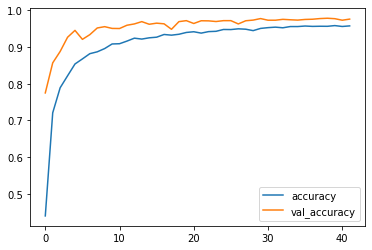

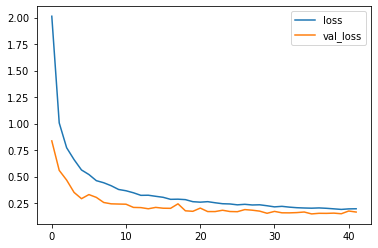

In [30]:
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [31]:
model.evaluate(test_generator)

53/53 [==============================] - 4s 67ms/step - loss: 0.1658 - accuracy: 0.9759


[0.16575375199317932, 0.9758928418159485]

In [39]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred)


105/105 [==============================] - 6s 56ms/step
[ 4 24 17 ...  2 19 19]


In [40]:
pred.shape


(3360,)

Text(0.5, 1.0, 'ت')

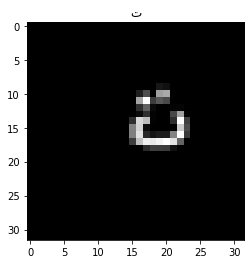

In [37]:
plt.imshow(x_test[14],"gray")
plt.title(arabic_chars[pred[14]])

Text(0.5, 1.0, 'ط')

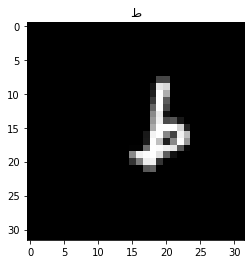

In [44]:
plt.imshow(x_test[19],"gray")
plt.title(arabic_chars[pred[19]])

In [45]:
y_test_h[14]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [46]:
import matplotlib. image as image

In [47]:
img=image.imread('C:/Users/Soukaina/Devoirs DL/AHW/imane.png')

In [48]:
img.shape

(134, 234, 4)

In [50]:
img1=img/255

In [53]:
img.resize(1024)

In [54]:
img.shape

(1024,)

In [57]:
img.reshape(-1,32,32,1)

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.00392157],
         [0.00392157],
         [1.        ]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [1.        ]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [1.        ]]]], dtype=float32)

In [67]:
new_image = tf.expand_dims(img,axis=0)

In [68]:
predimg = model.predict(new_image)

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Program Files\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Program Files\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Program Files\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Program Files\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\kernelapp.py", line 707, in start
      self.io_loop.start()
    File "C:\Program Files\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Program Files\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Program Files\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\kernelbase.py", line 398, in dispatch_shell
      await result
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Program Files\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2957, in run_cell
      result = self._run_cell(
    File "C:\Program Files\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3003, in _run_cell
      return runner(coro)
    File "C:\Program Files\Python310\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Program Files\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3228, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Program Files\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Program Files\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3524, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Soukaina\AppData\Local\Temp\ipykernel_16636\930901116.py", line 1, in <cell line: 1>
      predimg = model.predict(img)
    File "C:\Program Files\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Program Files\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Program Files\Python310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 278, in call
      return self.activation(outputs)
    File "C:\Program Files\Python310\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "C:\Program Files\Python310\lib\site-packages\keras\backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
input must be 4-dimensional[1,1024]
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_49072]